In [7]:
import json
import numpy as np
from Bio import SeqIO
import math
import random

# Load dictionary that maps k-mer to their corresponding index.
# A k-mer and its reverse complement are mapped to the same index.


with open("/home/zhenhao/bucket-map/seed_selection/index/9-mers.json", 'r') as dict_file:
    canonical_kmer_dict = json.load(dict_file)

# We define a utility function here that turns sequences to their 9-mer profiles.

def sequence_to_kmer_profile(sequence : str, k : int = 9, dtype=bool):
    """
    Return the k-mer profile of the input sequence (string)
    """
    res = np.zeros(len(set(canonical_kmer_dict.values())), dtype=dtype)
    for i in range(len(sequence) - k + 1):
        k_mer = sequence[i:i + k]
        if k_mer in canonical_kmer_dict:
            res[canonical_kmer_dict[k_mer]] = 1

    return res

def read_buckets_from_file(sequence_file_name : str, bucket_len : int, overlap_len : int):
    """
    Read the DNA sequence and store the sequences in buckets.
    """
    res = []

    for record in SeqIO.parse(sequence_file_name, "fasta"):
        record_sequence = str(record.seq)

        # Split the sequences into buckets
        num_buckets = math.ceil(len(record_sequence) / bucket_len)
        for i in range(num_buckets):
            bucket_sequence = record_sequence[i*bucket_len : (i+1)*bucket_len + overlap_len]
            res.append(sequence_to_kmer_profile(bucket_sequence))

    return res



In [8]:
bucket_len = 65536
overlap_len = 300

buckets_1 = read_buckets_from_file("../data/485870.fna", bucket_len, overlap_len)
buckets_2 = read_buckets_from_file("../data/2745495.fna", bucket_len, overlap_len)

In [19]:
sim = []
for i in range(len(buckets_1)):
    for j in range(len(buckets_2)):
        sim.append((buckets_1[i] & buckets_2[j]).sum())

In [21]:
max(sim)

27257

{'whiskers': [<matplotlib.lines.Line2D at 0x7efbf5b20070>,
 'caps': [<matplotlib.lines.Line2D at 0x7efbf5b205b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efbf5acbd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7efbf5b20af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efbf5b20d90>],
 'means': []}

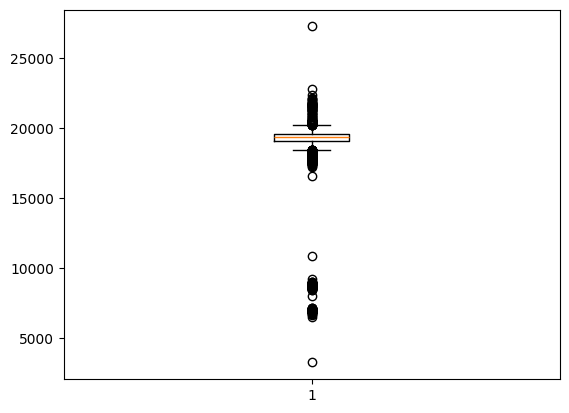

In [22]:
import matplotlib.pyplot as plt

plt.boxplot(sim)

In [ ]:
cluster1 = []


with open("../data/clusters.out") as c:
    mummers = c.readlines()
    for m in mummers:
        if m[0] == '#':
            # New cluster